In [1]:
from pymoo.algorithms.soo.nonconvex.ga import GA
from pymoo.problems import get_problem
from pymoo.optimize import minimize

problem = get_problem("g1")

algorithm = GA(
    pop_size=100,
    eliminate_duplicates=True)

res = minimize(problem,
               algorithm,
               seed=1,
               verbose=True)

print("Best solution found: \nX = %s\nF = %s" % (res.X, res.F))

n_gen  |  n_eval  |     cv_min    |     cv_avg    |     f_avg     |     f_min     |     f_gap    
     1 |      100 |  6.524381E+01 |  5.458088E+02 |             - |             - |             -
     2 |      200 |  2.061198E+01 |  3.451699E+02 |             - |             - |             -
     3 |      300 |  1.428459E+01 |  2.107717E+02 |             - |             - |             -
     4 |      400 |  1.079735E+01 |  1.079356E+02 |             - |             - |             -
     5 |      500 |  1.6845499757 |  5.027614E+01 |             - |             - |             -
     6 |      600 |  0.000000E+00 |  2.199516E+01 | -6.664333E-02 | -6.664333E-02 |  1.493336E+01
     7 |      700 |  0.000000E+00 |  1.007941E+01 | -1.072899E-01 | -4.510269E-01 |  1.454897E+01
     8 |      800 |  0.000000E+00 |  3.9490966193 | -1.899978E-01 | -1.110260E+00 |  1.388974E+01
     9 |      900 |  0.000000E+00 |  1.1987030960 | -1.588305E-01 | -3.139934E+00 |  1.186007E+01
    10 |     1000 | 

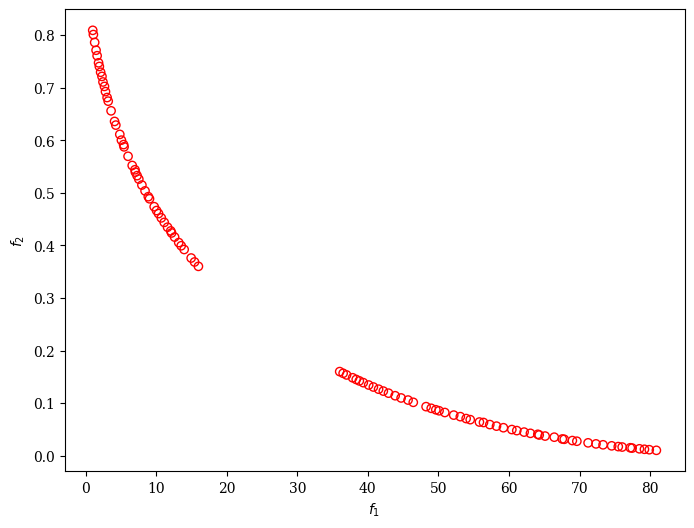

In [2]:
import numpy as np

from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.core.problem import ElementwiseProblem
from pymoo.optimize import minimize
from pymoo.visualization.scatter import Scatter


class MyProblem(ElementwiseProblem):

    def __init__(self):
        super().__init__(n_var=2,
                         n_obj=2,
                         n_ieq_constr=2,
                         xl=np.array([-2, -2]),
                         xu=np.array([2, 2]))

    def _evaluate(self, x, out, *args, **kwargs):
        f1 = 100 * (x[0] ** 2 + x[1] ** 2)
        f2 = (x[0] - 1) ** 2 + x[1] ** 2

        g1 = 2 * (x[0] - 0.1) * (x[0] - 0.9) / 0.18
        g2 = - 20 * (x[0] - 0.4) * (x[0] - 0.6) / 4.8

        out["F"] = [f1, f2]
        out["G"] = [g1, g2]


problem = MyProblem()

algorithm = NSGA2(pop_size=100)

res = minimize(problem,
               algorithm,
               ("n_gen", 100),
               verbose=False,
               seed=1)

plot = Scatter()
plot.add(res.F, edgecolor="red", facecolor="none")
plot.show()